YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


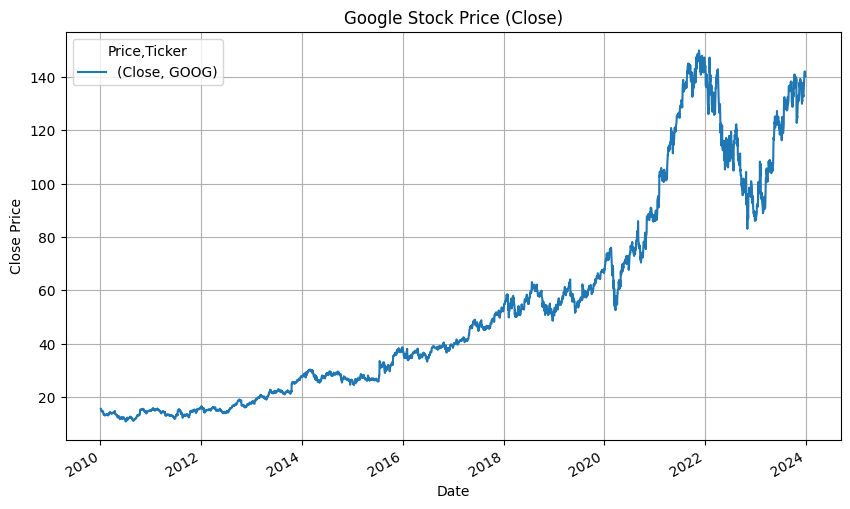

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 0.0152 - val_loss: 0.0038
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 2.2611e-04 - val_loss: 0.0015
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 1.6255e-04 - val_loss: 0.0016
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 1.4474e-04 - val_loss: 0.0016
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 1.4206e-04 - val_loss: 0.0018
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 1.6179e-04 - val_loss: 0.0021
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 1.4703e-04 - val_loss: 0.0016
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 1.3956e-04 - val_loss: 0.0012
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 1.5718e-04 - val_loss: 0.0023
Epoch 10/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 1.5876e-04 - val_loss: 0.0011
Epoch 11/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 1.3332e-04 - val_loss: 0.0019
Epoch 12/20
44/44 ━━━━━━━━━━━━━━━━

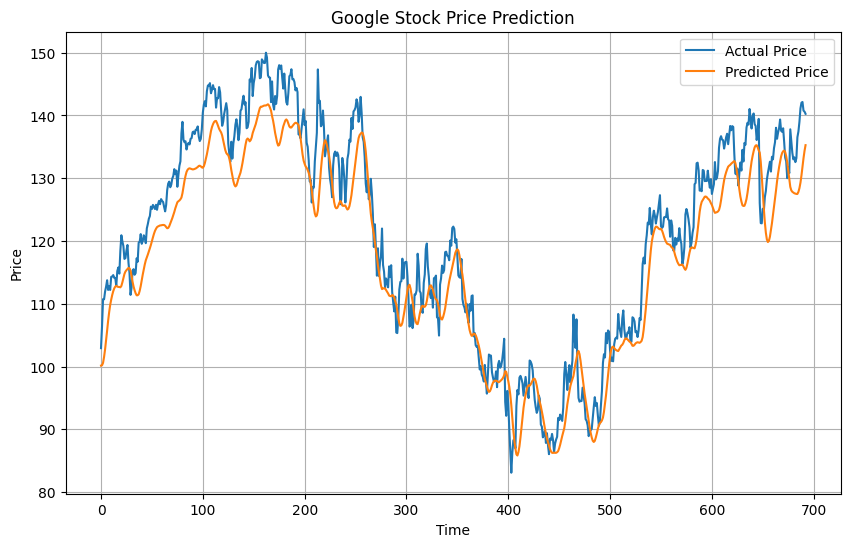

In [1]:
# STEP 1: Install required libraries
!pip install yfinance --quiet

# STEP 2: Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# STEP 3: Load Google stock price data (GOOG)
data = yf.download('GOOG', start='2010-01-01', end='2023-12-31')
data = data[['Close']]
data.dropna(inplace=True)

# Plot the data
data.plot(figsize=(10, 6))
plt.title('Google Stock Price (Close)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid()
plt.show()

# STEP 4: Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# STEP 5: Create sequences for time series
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i+time_step, 0])
        y.append(dataset[i+time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# STEP 6: Split into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# STEP 7: Build RNN (LSTM) model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50),
    Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

# STEP 8: Predict and plot
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions
plt.figure(figsize=(10,6))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(test_predict, label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()
